# Step 1: Data Preparation

In [1]:
import pandas as pd
import warnings
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
warnings.filterwarnings('ignore')
energy_data=pd.read_csv(r"C:\Users\prath\Downloads\PJME_hourly.csv")
energy_data.head()

,Datetime,PJME_MW
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [2]:
# Check for missing values
energy_data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [3]:
#filling the null values values
energy_data['PJME_MW'].fillna(method='ffill', inplace=True) 

In [4]:
# 'Datetime' is the column containing timestamps
energy_data['Datetime'] = pd.to_datetime(energy_data['Datetime'])
energy_data.set_index('Datetime', inplace=True)
energy_data = energy_data.resample('H').mean()

In [5]:
# Fill missing values with the mean of each column
energy_data.fillna(energy_data.mean(), inplace=True)

In [6]:
#To check whether the data is stationary or not
result = adfuller(energy_data['PJME_MW'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])


ADF Statistic: -19.998983
p-value: 0.000000


ADF Statistic (-19.998983): The ADF statistic is highly negative. In the context of the Augmented Dickey-Fuller (ADF) test, more negative values indicate stronger evidence for the series being stationary. The ADF statistic being significantly negative supports the hypothesis that the data is stationary.

p-value (0.000000): The reported p-value being extremely close to zero (likely a very small value rounded to 0.000000) suggests an extraordinarily high level of significance. This tiny p-value means there's extremely strong evidence against the null hypothesis of non-stationarity. In essence, the p-value being practically zero indicates that the time series data is highly likely to be stationary.

# Step 2: Exploratory Data Analysis (EDA)

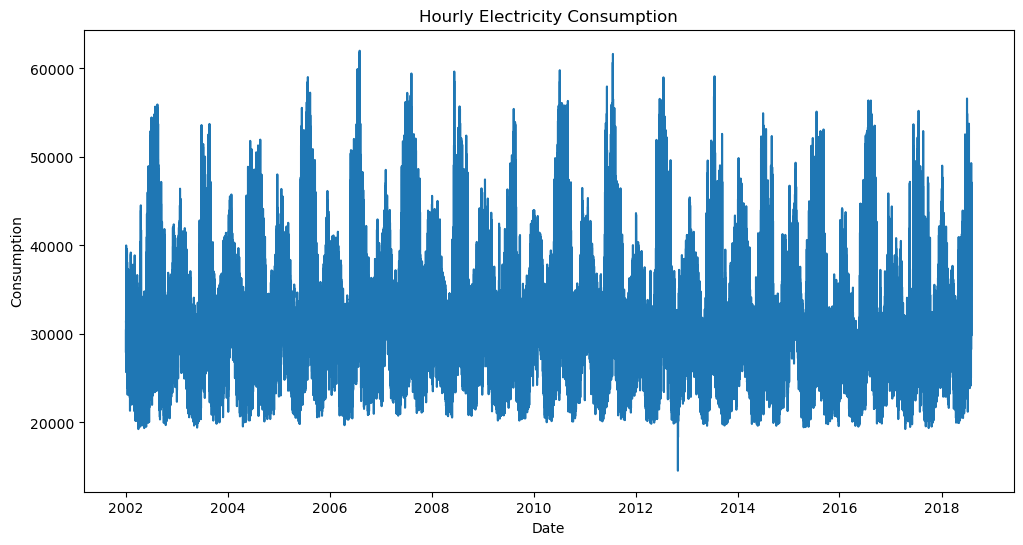

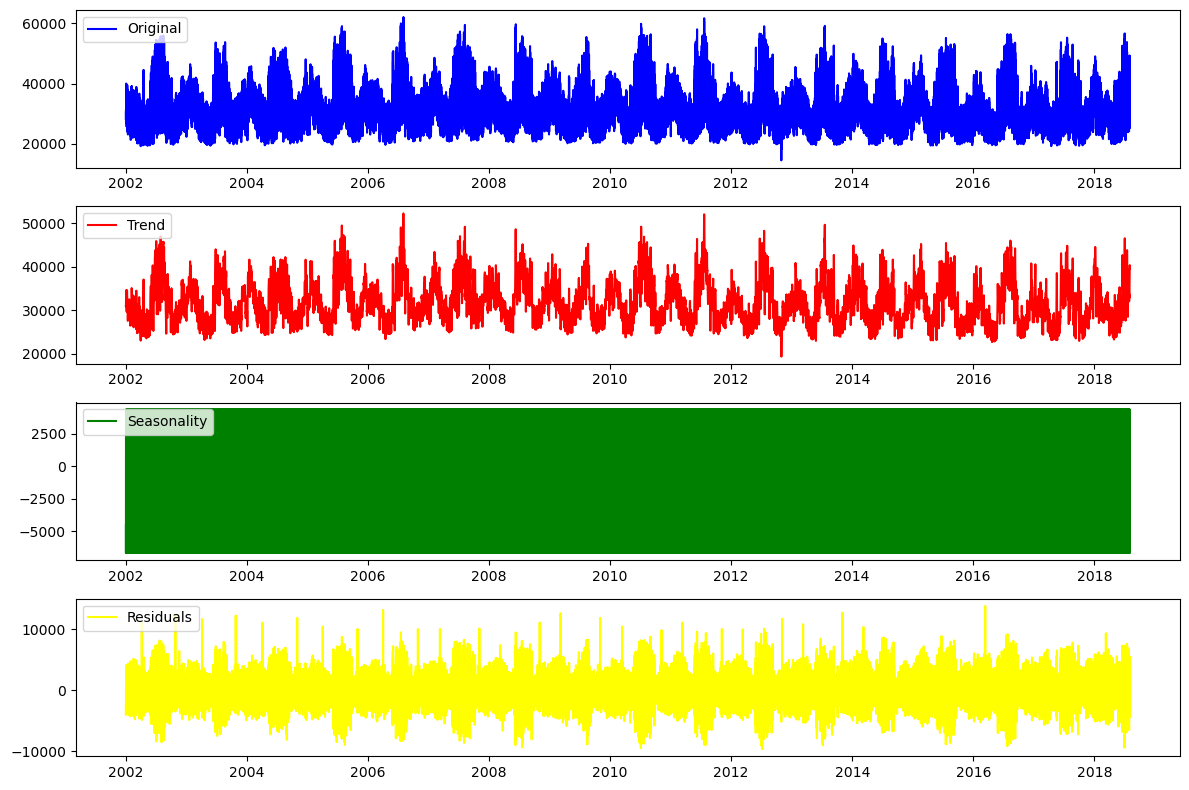

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the time series data
plt.figure(figsize=(12, 6))
plt.plot(energy_data['PJME_MW'])
plt.title('Hourly Electricity Consumption')
plt.xlabel('Date')
plt.ylabel('Consumption')
plt.show()

# Decompose the time series to analyze trend, seasonality, and residuals
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(energy_data['PJME_MW'], model='additive')
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.figure(figsize=(12, 8))
plt.subplot(411)
plt.plot(energy_data['PJME_MW'], label='Original', color='blue')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Trend', color='red')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Seasonality', color='green')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Residuals', color='yellow')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


In [8]:
energy_data.head()

,PJME_MW
Datetime,
2002-01-01 01:00:00,30393.0
2002-01-01 02:00:00,29265.0
2002-01-01 03:00:00,28357.0
2002-01-01 04:00:00,27899.0
2002-01-01 05:00:00,28057.0



# Step 3: Feature Engineering

In [9]:
# Feature Engineering
energy_data['Hour'] = energy_data.index.hour
energy_data['DayOfYear'] = energy_data.index.dayofyear
energy_data['WeekOfYear'] = energy_data.index.isocalendar().week
energy_data['Quarter'] = energy_data.index.quarter
energy_data['Month'] = energy_data.index.month
energy_data['Year'] = energy_data.index.year
energy_data['PreviousHourConsumption'] = energy_data['PJME_MW'].shift(1)
energy_data.dropna(inplace=True)


In [10]:
# Create lag features (e.g., previous hour consumption)
energy_data['PreviousHourConsumption'] = energy_data['PJME_MW'].shift(1)
# Add other relevant features based on your analysis

# Drop missing values created due to lag features
energy_data.dropna(inplace=True)

# Step 4: Regression Analysis

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error



# Drop missing values created due to lag features or during the extraction of time components
energy_data.dropna(inplace=True)

# Split data into features (X) and target variable (y)
X = energy_data[['Hour', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Month', 'Year', 'PreviousHourConsumption']]
y = energy_data['PJME_MW']
# Split data into training and testing sets
X = energy_data[['Hour', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Month', 'Year', 'PreviousHourConsumption']]
y = energy_data['PJME_MW']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate model performance
print("R-squared:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))


R-squared: 0.9503106363879993
Mean Squared Error: 2087411.781352643


In [12]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Your previous code for model training and prediction

# Calculate additional evaluation metrics
predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print("R-squared:", r2_score(y_test, predictions))
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("Root Mean Squared Error:", rmse)

R-squared: 0.9503106363879993
Mean Absolute Error: 1105.4207889866825
Mean Squared Error: 2087411.781352643
Root Mean Squared Error: 1444.7877980356295


# Ordinary Least Square

In [13]:
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

# Assuming energy_data is your DataFrame
# Fill missing values with a chosen strategy, such as mean or median
energy_data.fillna(energy_data.mean(), inplace=True)

# Ensure all columns used in the model are of numeric types
numeric_columns = ['Hour', 'DayOfYear', 'WeekOfYear', 'Quarter', 'Month', 'Year', 'PreviousHourConsumption', 'PJME_MW']
energy_data = energy_data[numeric_columns].astype(float)  # Convert to float

# Split data into features (X) and target variable (y)
X = energy_data.drop('PJME_MW', axis=1)
y = energy_data['PJME_MW']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Add a constant to the features for the OLS model
X_train = sm.add_constant(X_train)
X_test = sm.add_constant(X_test)

# Fit an OLS model
model = sm.OLS(y_train, X_train).fit()

# Predict on the test set
predictions = model.predict(X_test)

# Evaluate model performance
print("R-squared:", r2_score(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))

# Summary of the OLS model
print(model.summary())


R-squared: 0.9503106363879993
Mean Squared Error: 2087411.7813526425
                            OLS Regression Results                            
Dep. Variable:                PJME_MW   R-squared:                       0.950
Model:                            OLS   Adj. R-squared:                  0.950
Method:                 Least Squares   F-statistic:                 3.127e+05
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:00:16   Log-Likelihood:            -1.0118e+06
No. Observations:              116312   AIC:                         2.024e+06
Df Residuals:                  116304   BIC:                         2.024e+06
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------

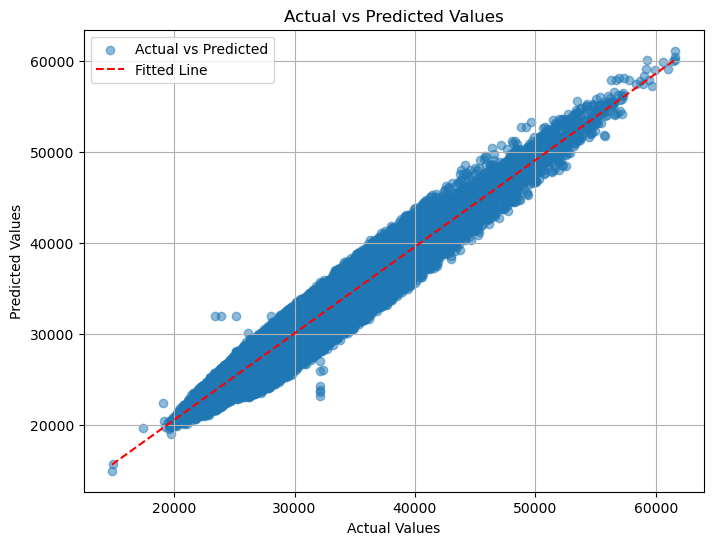

In [17]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot for actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, alpha=0.5, label='Actual vs Predicted')
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, predictions, 1))(np.unique(y_test)),
         color='red', linestyle='--', label='Fitted Line')

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()
